In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train_data = pd.read_csv('train.csv')

In [9]:
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [10]:
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)

In [12]:
train_data = train_data.drop(['Cabin', 'Ticket'], axis=1)

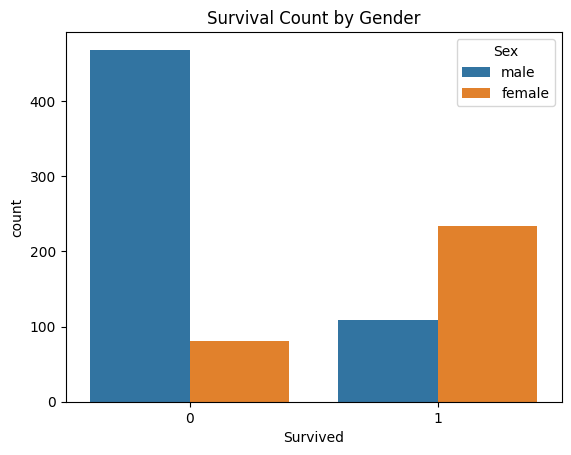

In [13]:
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Survival Count by Gender')
plt.show()

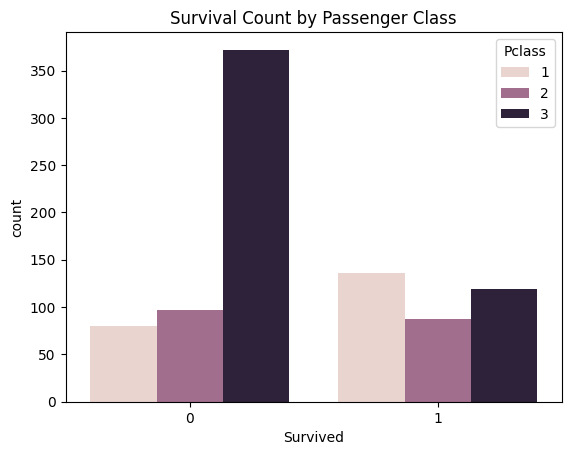

In [14]:
sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.title('Survival Count by Passenger Class')
plt.show()

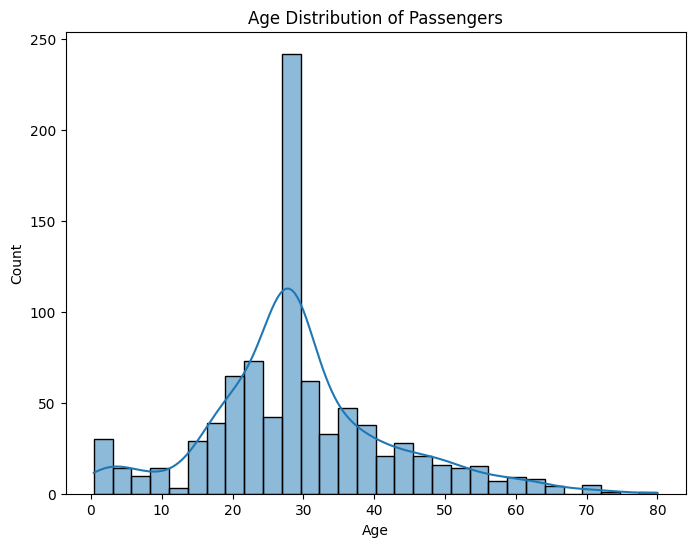

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(train_data['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.show()

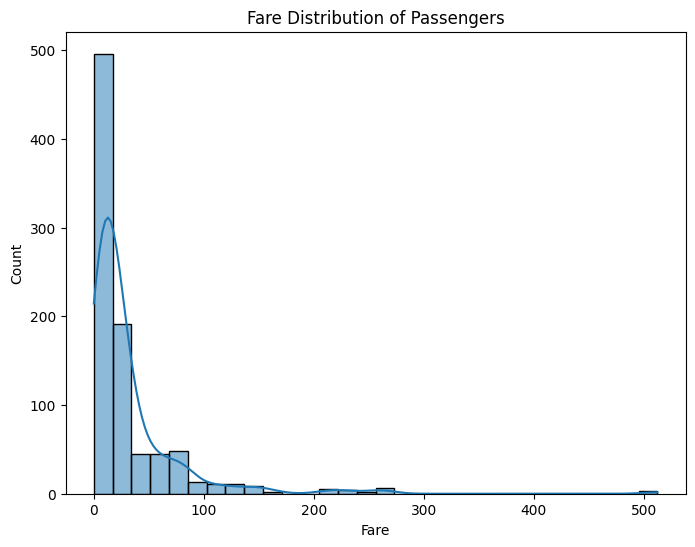

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(train_data['Fare'], bins=30, kde=True)
plt.title('Fare Distribution of Passengers')
plt.xlabel('Fare')
plt.show()

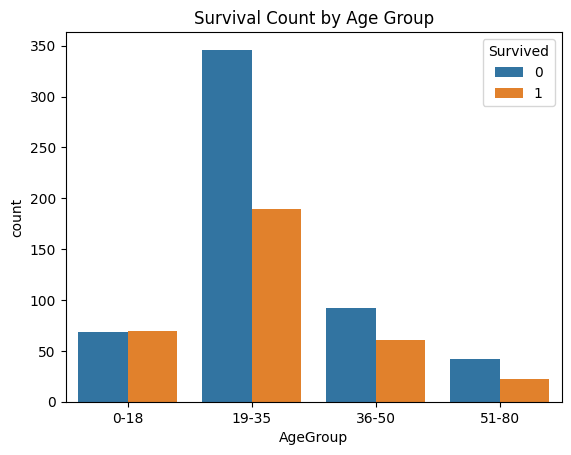

In [18]:
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=[0, 18, 35, 50, 80], labels=['0-18', '19-35', '36-50', '51-80'])
sns.countplot(x='AgeGroup', hue='Survived', data=train_data)
plt.title('Survival Count by Age Group')
plt.show()

In [20]:
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train_data[numeric_columns].corr()

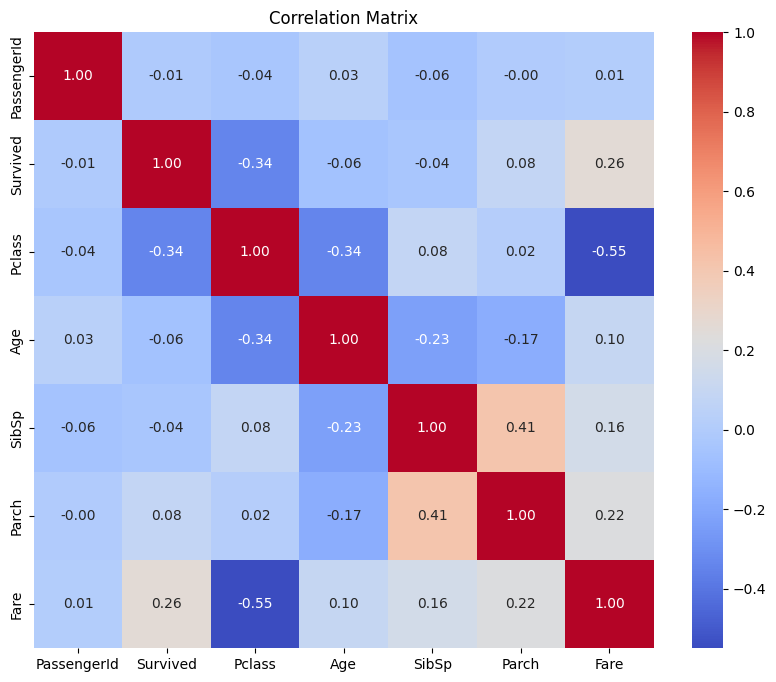

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()